<a href="https://colab.research.google.com/github/nzl-thu/PRMLTA/blob/main/toy_torch_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Putting It All Together

## Data Preparation

In [1]:
import torch
from matplotlib import pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Initialize weights and data
N, Din, H, Dout = 128, 64, 64, 1
lr = 5e-5

# Training data
x_train = torch.randn(N, Din)
y_train = torch.zeros(N, 1)
x_train[:N // 2, 0] = x_train[:N // 2, 0] * 2 + 5
y_train[:N // 2, 0] = 1

# Test data
N_test = N
x_test = torch.randn(N_test, Din)
y_test = torch.zeros(N_test, 1)
x_test[:N_test // 2, 0] = x_test[:N_test // 2, 0] * 2 + 5
y_test[:N_test // 2, 0] = 1

## Defining Neural Network

In [15]:
from torch import nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.theta1 = nn.Linear(Din, H, bias=False)
        self.theta2 = nn.Linear(H, Dout, bias=False)
        
    def forward(self, x):
        x = F.sigmoid(self.theta1(x))
        x = F.sigmoid(self.theta2(x))
        return x

net = Net()

## Defining optimizer

In [16]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

## Training Loop

In [17]:
# Training
loss_list = []
accuracy_list = []
for t in range(10000):
    optimizer.zero_grad()
    # Forward
    y_pred = net(x_train)
    
    # Calculate loss
    loss = torch.mean(-(1 - y_train) * torch.log(1 - y_pred) - y_train * torch.log(y_pred))
    loss_list.append(loss.item())

    # Test accuracy
    with torch.no_grad():
        y_pred_test = net(x_test)
        accuracy = torch.mean(((y_pred_test > 0.5) == y_test).float()).item() * 100.0
        accuracy_list.append(accuracy)
    
    # Backward
    loss.backward()
    
    # Update weights with gradient descent
    optimizer.step()


## Plot Curve

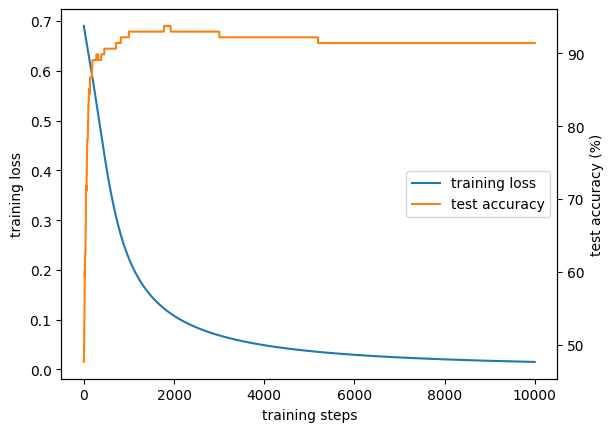

In [18]:
# Plot
fig, ax1 = plt.subplots()
ax1.set_xlabel("training steps")
ax1.set_ylabel("training loss")
loss_curve = ax1.plot(range(len(loss_list)), loss_list, label="training loss", color="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("test accuracy (%)")
accuracy_curve = ax2.plot(range(len(accuracy_list)), accuracy_list, label="test accuracy", color="tab:orange")

curves = loss_curve + accuracy_curve
labels = [c.get_label() for c in curves]
ax1.legend(curves, labels, loc="center right")

plt.show()